## Importing all the dependencies

In [1]:
#importing all the dependencies

import pandas as pd
import os
import json
from scipy.io import wavfile
import glob
import collections
import matplotlib.pyplot as plt
from python_speech_features import mfcc
import csv
import os
import wave
from scipy.io.wavfile import read
from sklearn import preprocessing as pp
import numpy as np
import librosa
import librosa.display
import sklearn
import sklearn.ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import decomposition 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import cross_validation
import pickle

C:\Users\Aditya Aggarwal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

path1 = r'C:\Users\Aditya Aggarwal\Minor\genre\blues'
blues = []
for filename in glob.glob(os.path.join(path1, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    blues.append( data[: , 0])
blues = np.array(blues)    
print(blues[0])
d = []
d = librosa.feature.mfcc(np.array(blues[0]).flatten() , 44100 , n_mfcc = 20)
print(d)
print(d.shape)
#mfcc_feat = mfcc(data,rate)
#print(mfcc_feat)
#redusing mfcc dimension to 104
#mm = np.transpose(mfcc_feat)
#mf = np.mean(mm,axis=1)
#cf = np.cov(mm)
#ff=mf 

[ 170  255  385 ..., -875 -748 -686]
[[  7.16443143e+02   7.21613339e+02   7.15084481e+02 ...,   8.07158893e+02
    8.03672879e+02   7.98191918e+02]
 [  1.50982821e+02   1.56349040e+02   1.52836858e+02 ...,   2.00576343e+02
    2.02365241e+02   1.98448287e+02]
 [ -3.88862373e+01  -3.75724955e+01  -3.88825906e+01 ...,  -6.01000865e+01
   -6.09293814e+01  -6.48570812e+01]
 ..., 
 [  5.12762779e+00  -5.63698943e-01  -6.70572693e+00 ...,  -9.07922513e+00
   -7.70967240e+00  -1.20309769e+01]
 [ -2.40058332e+00  -5.43993419e+00  -7.74070779e+00 ...,   6.38774848e+00
    8.72633833e+00   6.13289890e+00]
 [ -1.12062080e+00  -2.31811470e+00  -5.15998213e-01 ...,   4.80575992e+00
    9.85532547e+00   9.46684462e+00]]
(20, 1297)


## Importing all the audio files from genre folders

In [3]:

#import the audio files from genre folder
#class = target representation
#blues  = 1
#classical = 2
#country = 3
#disco = 4
#hiphop = 5
#jazz = 6
#metal = 7
#pop = 8

audio_files = []
path1 = r'C:\Users\Aditya Aggarwal\Minor\genre\blues'
path2 = r'C:\Users\Aditya Aggarwal\Minor\genre\classical'
path3 = r'C:\Users\Aditya Aggarwal\Minor\genre\country'
path4 = r'C:\Users\Aditya Aggarwal\Minor\genre\disco'
path5 = r'C:\Users\Aditya Aggarwal\Minor\genre\hiphop'
path6 = r'C:\Users\Aditya Aggarwal\Minor\genre\jazz'
path7 = r'C:\Users\Aditya Aggarwal\Minor\genre\metal'
path8 = r'C:\Users\Aditya Aggarwal\Minor\genre\pop'


from scipy.io.wavfile import read

blues = []
classical = []
country = []
disco = []
hiphop = []
jazz = []
metal = []
pop = []

target = []

for filename in glob.glob(os.path.join(path1, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    blues.append( data[: , 0])
    target.append(1)

blues = np.array(blues)
    
for filename in glob.glob(os.path.join(path2, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    classical.append( data[: , 0])
    target.append(2)
    
classical = np.array(classical)
    
for filename in glob.glob(os.path.join(path3, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    country.append(data[: , 0])
    target.append(3)
    
country = np.array(country)
    
for filename in glob.glob(os.path.join(path4, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    disco.append(data[: , 0])
    target.append(4)
    
disco = np.array(disco)
    
for filename in glob.glob(os.path.join(path5, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    hiphop.append(data[: , 0])
    target.append(5)
    
hiphop = np.array(hiphop) 
    
for filename in glob.glob(os.path.join(path6, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    jazz.append(data[: , 0])
    target.append(6)
    
jazz = np.array(jazz)
    
for filename in glob.glob(os.path.join(path7, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    metal.append(data[: , 0])
    target.append(7)
    
metal = np.array(metal)
    
for filename in glob.glob(os.path.join(path8, '*.wav')):
    (rate , data) = read(filename)
    data = np.array(data)
    pop.append(data[: , 0])
    target.append(8)
    
pop = np.array(pop)

    


## FEATURE EXTRACTION

## Calculating the energy spectrums of different audio files of all the genres 

In [4]:

blues_spectrum = []
classical_spectrum = []
country_spectrum = []
disco_spectrum = []
hiphop_spectrum = []
jazz_spectrum = []
metal_spectrum = []
pop_spectrum = []

print(len(classical))

for i in range(100):
    blues_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(blues[i]))**2) )
    classical_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(classical[i]))**2))
    country_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(country[i]))**2))
    disco_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(disco[i]))**2))
    hiphop_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(hiphop[i]))**2))
    jazz_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(jazz[i]))**2))
    metal_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(metal[i]))**2))
    pop_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(pop[i]))**2))
    


print(blues_spectrum[0])

100
[[  2.36450086e+09   2.44423493e+09   2.28973657e+09 ...,   1.75325322e+10
    1.75590233e+10   4.46443586e+09]
 [  5.35981146e+08   6.36238844e+08   8.60851811e+08 ...,   1.07902769e+10
    9.66376893e+09   3.74662757e+09]
 [  2.56285451e+08   5.30226287e+08   4.98496068e+08 ...,   4.08529577e+09
    2.38536344e+09   2.08312339e+09]
 ..., 
 [  2.28710541e+00   1.90597102e+00   1.74139850e+00 ...,   3.19551519e+00
    3.99117896e+00   4.42300415e+00]
 [  3.13142230e+00   2.81164611e+00   2.24477805e+00 ...,   3.20717244e+00
    3.18679643e+00   3.75965167e+00]
 [  3.63538286e+00   3.59062775e+00   3.48610954e+00 ...,   1.25605875e+01
    9.12786757e+00   5.62714033e+00]]


## Displaying the Mel Spectrogram

## Mel spectrogram represents distribution of energies to pass it through mel filter banks. These mel filter banks ensures that the unpleasant noise or disturbances are removed from original data to avoid overfitting.


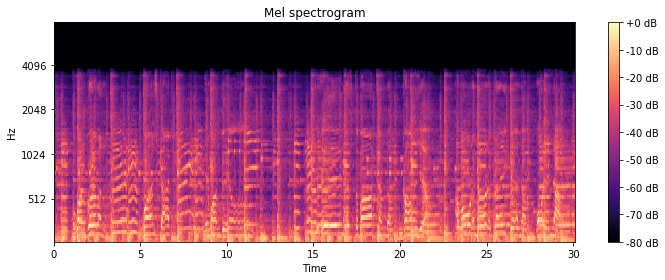

In [5]:
#observing variation of mel spectrogram through librosa.display library

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(blues_spectrum[0], ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

#we have used power_to_db for scaling of mel_spectrogram features and its representation in decibel unit.

 ## MFCC(Mel Frequency Cepstral Coefficient) - this method is used for features extraction . The following steps are used for features extarction using mfcc: 
 
## 1. spliting an original data(audio file) into small partitions (30 sec into many small partitions of 20msec)
## 2.For each frame calculate the periodogram estimate of the power spectrum.
## 3.Apply the mel filterbank to the power spectra, sum the energy in each filter.
## 4.Take the logarithm of all filterbank energies.
## 5.Take the DCT of the log filterbank energies.
## 6.Keep DCT coefficients 2-13, discard the rest

## Apply mfcc to audio files and reducing the mfcc features by taking the mean value for those features and its dimensions to 13 features

(13, 325)
(13,)
[  2.15166826e+03   3.86021305e+01  -1.18900041e+01   7.62641036e+00
  -3.97585096e+00   3.97239604e+00  -6.19740171e-01   3.79588042e+00
  -5.38200156e-02   1.30590481e+00  -1.28472464e+00  -2.09591656e-01
  -1.35185945e+00]


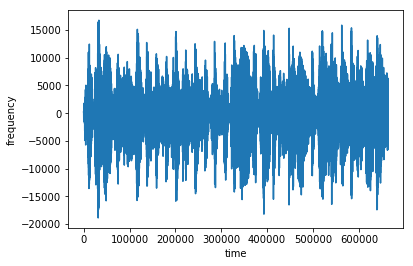

In [6]:
blues_mfcc = []
classical_mfcc = []
country_mfcc = []
disco_mfcc = []
hiphop_mfcc = []
jazz_mfcc = []
metal_mfcc = []
pop_mfcc = []

print(librosa.feature.mfcc(np.array(blues_spectrum[0]).flatten() , 44100 , n_mfcc = 13).shape)

for i in range(100):
    blues_mfcc.append(np.mean(librosa.feature.mfcc(np.array(blues_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))    
    classical_mfcc.append(np.mean(librosa.feature.mfcc(np.array(classical_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    country_mfcc.append(np.mean(librosa.feature.mfcc(np.array(country_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    disco_mfcc.append(np.mean(librosa.feature.mfcc(np.array(disco_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    hiphop_mfcc.append(np.mean(librosa.feature.mfcc(np.array(hiphop_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    jazz_mfcc.append(np.mean(librosa.feature.mfcc(np.array(jazz_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    metal_mfcc.append(np.mean(librosa.feature.mfcc(np.array(metal_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    pop_mfcc.append(np.mean(librosa.feature.mfcc(np.array(pop_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
print(blues_mfcc[0].shape)
print(blues_mfcc[0])
plt.plot(blues[0])
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

In [7]:
print(country_mfcc[0])

[  2.29850231e+03   4.94682259e+01  -7.84814117e+00   1.15256256e+01
  -1.63656162e+00   5.50984785e+00   7.27451949e-01   3.04428661e+00
   2.76107502e-01   9.73695519e-01   6.65060263e-01   1.94965891e+00
   1.07562753e+00]


## MFCC PLOT

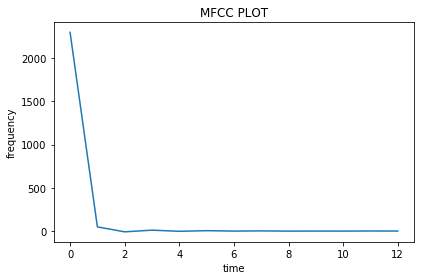

In [8]:
#plot for an MFCC of stereotype audio (dual audio channels with small difference in bandwidth)

plt.plot(country_mfcc[0])
plt.xlabel('time')
plt.ylabel('frequency')
plt.title('MFCC PLOT')
plt.tight_layout()
plt.show()

## Calculating delta and delta-delta for corresponding mfcc values 

In [9]:

blues_mfcc_delta = []
classical_mfcc_delta = []
country_mfcc_delta = []
disco_mfcc_delta = []
hiphop_mfcc_delta = []
jazz_mfcc_delta = []
metal_mfcc_delta = []
pop_mfcc_delta = []

blues_mfcc_delta2 = []
classical_mfcc_delta2 = []
country_mfcc_delta2 = []
disco_mfcc_delta2 = []
hiphop_mfcc_delta2 = []
jazz_mfcc_delta2 = []
metal_mfcc_delta2 = []
pop_mfcc_delta2 = []

for i in range(100):
    blues_mfcc_delta.append(librosa.feature.delta(blues_mfcc[i]))
    classical_mfcc_delta.append(librosa.feature.delta(classical_mfcc[i]))
    country_mfcc_delta.append(librosa.feature.delta(country_mfcc[i]))
    disco_mfcc_delta.append(librosa.feature.delta(disco_mfcc[i]))
    hiphop_mfcc_delta.append(librosa.feature.delta(hiphop_mfcc[i]))
    jazz_mfcc_delta.append(librosa.feature.delta(jazz_mfcc[i]))
    metal_mfcc_delta.append(librosa.feature.delta(metal_mfcc[i]))
    pop_mfcc_delta.append(librosa.feature.delta(pop_mfcc[i]))

print(blues_mfcc_delta[0])
print('shape of delta :' , blues_mfcc_delta[0].shape)

for i in range(100):
    blues_mfcc_delta2.append(librosa.feature.delta(blues_mfcc[i] , order = 2))
    classical_mfcc_delta2.append(librosa.feature.delta(classical_mfcc[i] , order = 2))
    country_mfcc_delta2.append(librosa.feature.delta(country_mfcc[i] , order = 2))
    disco_mfcc_delta2.append(librosa.feature.delta(disco_mfcc[i] , order = 2))
    hiphop_mfcc_delta2.append(librosa.feature.delta(hiphop_mfcc[i] , order = 2))
    jazz_mfcc_delta2.append(librosa.feature.delta(jazz_mfcc[i] , order = 2))
    metal_mfcc_delta2.append(librosa.feature.delta(metal_mfcc[i] , order = 2))
    pop_mfcc_delta2.append(librosa.feature.delta(pop_mfcc[i] , order = 2))

print(blues_mfcc_delta2[0])
print('shape of delta2 :' , blues_mfcc_delta2[0].shape)

[ -3.58248077e+02  -3.58489295e+02  -3.23241725e+02  -2.51828313e+02
  -1.44873676e+02  -1.96635499e+00   5.18785794e-01  -4.67294857e-01
  -9.78323603e-02  -5.45587143e-01  -3.74721201e-01  -4.97795686e-01
  -2.40699799e-01]
shape of delta : (13,)
[-89.48778489 -80.60227642 -63.98979398 -42.01054036 -18.26680903
  17.41863827  41.56327795  54.2007272   56.73416597  50.8220168
  38.93944901  24.01739753   9.68453792]
shape of delta2 : (13,)


## Calculating the rhythmic features for the audio files
## The rythmic features consists of beats and tempo. 
## Beat refers to pulse of time . Recognizing the beat in a song means finding the pattern and speed of the music.

In [10]:
blues_tempo = []
classical_tempo = []
country_tempo = []
disco_tempo = []
hiphop_tempo = []
jazz_tempo = []
metal_tempo = []
pop_tempo = []
for i in range(100):
    oenv_blues = librosa.onset.onset_strength(y = blues[i], sr= 44100, hop_length = 512)
    blues_tempo.append(librosa.beat.tempo(onset_envelope=oenv_blues ,sr=44100,hop_length=512)[0])
    oenv_classical = librosa.onset.onset_strength(y = classical[i], sr= 44100, hop_length = 512)
    classical_tempo.append(librosa.beat.tempo(onset_envelope=oenv_classical ,sr=44100,hop_length=512)[0])
    oenv_country = librosa.onset.onset_strength(y = country[i], sr= 44100, hop_length = 512)
    country_tempo.append(librosa.beat.tempo(onset_envelope=oenv_country ,sr=44100,hop_length=512)[0])
    oenv_disco = librosa.onset.onset_strength(y = disco[i], sr= 44100, hop_length = 512)
    disco_tempo.append(librosa.beat.tempo(onset_envelope=oenv_disco ,sr=44100,hop_length=512)[0])
    oenv_hiphop = librosa.onset.onset_strength(y = hiphop[i], sr= 44100, hop_length = 512)
    hiphop_tempo.append(librosa.beat.tempo(onset_envelope=oenv_hiphop ,sr=44100,hop_length=512)[0])
    oenv_jazz = librosa.onset.onset_strength(y = jazz[i], sr= 44100, hop_length = 512)
    jazz_tempo.append(librosa.beat.tempo(onset_envelope=oenv_jazz ,sr=44100,hop_length=512)[0])
    oenv_metal = librosa.onset.onset_strength(y = metal[i], sr= 44100, hop_length = 512)
    metal_tempo.append(librosa.beat.tempo(onset_envelope=oenv_metal ,sr=44100,hop_length=512)[0])
    oenv_pop = librosa.onset.onset_strength(y = pop[i], sr= 44100, hop_length = 512)
    pop_tempo.append(librosa.beat.tempo(onset_envelope=oenv_pop ,sr=44100,hop_length=512)[0])

## PREPROCESSING

(100, 663552)


C:\Users\Aditya Aggarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


[ 170  255  385 ..., -875 -748 -686]


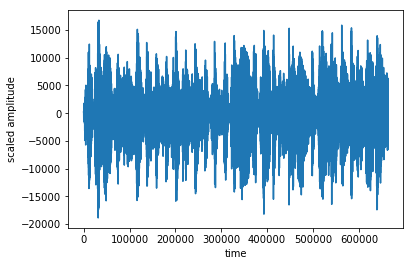

In [11]:
#preprocessing: MinMaxScaling with normalization using gaussian model. here, mean = 0 and standard dev. = 1 .


blues_scale = []
classical_scale = []
country_scale = []
disco_scale = []
hiphop_scale = []
jazz_scale = []
metal_scale = []
pop_scale = []

print(blues.shape)

for i in range(len(blues)):
    blues_scale.append(pp.scale(blues[i]))
    classical_scale.append( pp.scale(classical[i]))
    country_scale.append(pp.scale(country[i]))
    disco_scale.append(pp.scale(disco[i]))
    hiphop_scale.append(pp.scale(hiphop[i]))
    jazz_scale.append(pp.scale(jazz[i]))
    metal_scale.append(pp.scale(metal[i]))
    pop_scale.append(pp.scale(pop[i]))

print(blues[0])
plt.plot(blues[0])
plt.xlabel('time')
plt.ylabel('scaled amplitude')
plt.show()



## Adding X_value features and Target_features to form a dataset for applying cross_validation 

In [12]:
#adding X_value features and Target_features to form a dataset for applying cross_validation

dataset = [[0 for i in range(0, 41)]for j in range(0, 800)]
l = []
prev = []
k = 0
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = blues_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = blues_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = blues_mfcc_delta2[i][j]
    dataset[k][39] = blues_tempo[i]
    dataset[k][40] = target[i]    
    k += 1
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = classical_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = classical_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = classical_mfcc_delta2[i][j]
    dataset[k][39] = classical_tempo[i]
    dataset[k][40] = target[i+100]    
    k += 1    

for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = country_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = country_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = country_mfcc_delta2[i][j]
    dataset[k][39] = country_tempo[i]
    dataset[k][40] = target[i+200]    
    k += 1

for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = disco_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = disco_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = disco_mfcc_delta2[i][j]
    dataset[k][39] = disco_tempo[i]    
    dataset[k][40] = target[i+300]    
    k += 1
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = hiphop_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = hiphop_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = hiphop_mfcc_delta2[i][j]
    dataset[k][39] = hiphop_tempo[i]
    dataset[k][40] = target[i+400]    
    k += 1    
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = jazz_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = jazz_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = jazz_mfcc_delta2[i][j]
    dataset[k][39] = jazz_tempo[i]
    dataset[k][40] = target[i+500]    
    k += 1    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = metal_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = metal_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = metal_mfcc_delta2[i][j]
    dataset[k][39] = metal_tempo[i]
    dataset[k][40] = target[i+600]    
    k += 1    
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = pop_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = pop_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = pop_mfcc_delta2[i][j]
    dataset[k][39] = pop_tempo[i]
    dataset[k][40] = target[i+700]    
    k += 1        
dataset = np.array(dataset)
#print(np.array(dataset).shape)
#print(dataset)




In [13]:
dataset.shape

(800, 41)

dataset

## Applying PCA(Principal Component Analysis) for feature reduction 

In [14]:
sc = StandardScaler()
dataset1 = sc.fit_transform(dataset[:, 0:39])
#print(dataset)

In [15]:
pca = decomposition.PCA()
pca.fit(dataset1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
v = pca.explained_variance_
#print(v)
total = v.sum()
#print(total)
sum = 0
i = 0
while i < v.shape[0] :
    sum += v[i]
    if (sum/total > 0.95) :
        break
    i +=1
pca.n_components = i
dataset1 = pca.fit_transform(dataset1)


## Splitting the dataset into training and testing data using cross_validation technique 

In [17]:
train_x , test_x , train_y , test_y = cross_validation.train_test_split(dataset1 , target , test_size = 0.25 , random_state = 42)


## TRAINING

## Random Forest Classifier

In [18]:
accuracy = []
models = []

In [19]:
cls = sklearn.ensemble.RandomForestClassifier(n_estimators = 10 , criterion = 'entropy' , min_samples_split = 8)
#print(train_x)
#print(train_y.shape)
#for i in range(len(train_x)):
models = []
accuracy = []
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('random-forest')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ', accuracy_score(test_y , Y)*100)

Accuracy :  44.5


In [20]:
#pickling the randomForestClassifier
random_forest_file_name = 'random_forest.pkl'
random_forest_model_pkl = open(random_forest_file_name , 'wb')
pickle.dump(cls ,random_forest_model_pkl)
random_forest_model_pkl.close()

In [21]:
print('CONFUSION MATRIX')
confusion_matrix(Y,test_y)

CONFUSION MATRIX


array([[11,  1,  0,  1,  1,  1,  4,  0],
       [ 0, 13,  1,  0,  0, 10,  0,  0],
       [ 1,  0,  7,  0,  0,  4,  1,  3],
       [ 2,  0,  3, 12,  1,  1,  4,  4],
       [ 5,  0,  2,  8, 14,  0,  2,  5],
       [ 2,  2,  4,  0,  0, 10,  2,  1],
       [ 3,  0,  3,  8,  0,  1, 13,  5],
       [ 4,  1,  3,  1,  1,  1,  4,  9]])

In [22]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          1       0.58      0.39      0.47        28
          2       0.54      0.76      0.63        17
          3       0.44      0.30      0.36        23
          4       0.44      0.40      0.42        30
          5       0.39      0.82      0.53        17
          6       0.48      0.36      0.41        28
          7       0.39      0.43      0.41        30
          8       0.38      0.33      0.35        27

avg / total       0.45      0.45      0.44       200



## K Neighbors Classifier

In [23]:
cls = sklearn.neighbors.KNeighborsClassifier()
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('k-neighbors')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' ,accuracy_score(test_y , Y)*100)

Accuracy :  42.5


In [24]:
#pickling the KNeighborsClassifier
KNeighbors_file_name = 'KNeighbors.pkl'
KNeighbors_model_pkl = open(KNeighbors_file_name , 'wb')
pickle.dump(cls ,KNeighbors_model_pkl)
KNeighbors_model_pkl.close()

In [25]:
print('CONFUSION MATRIX')
confusion_matrix(Y,test_y)

CONFUSION MATRIX


array([[12,  0,  4,  6,  2,  3,  7,  6],
       [ 0, 13,  2,  1,  0, 12,  3,  1],
       [ 4,  1, 11,  4,  0,  5,  3,  2],
       [ 1,  0,  3, 12,  2,  0,  0,  7],
       [ 2,  0,  0,  4, 12,  0,  4,  3],
       [ 1,  3,  0,  0,  1,  7,  1,  0],
       [ 6,  0,  3,  2,  0,  0, 12,  2],
       [ 2,  0,  0,  1,  0,  1,  0,  6]])

In [26]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          1       0.30      0.43      0.35        28
          2       0.41      0.76      0.53        17
          3       0.37      0.48      0.42        23
          4       0.48      0.40      0.44        30
          5       0.48      0.71      0.57        17
          6       0.54      0.25      0.34        28
          7       0.48      0.40      0.44        30
          8       0.60      0.22      0.32        27

avg / total       0.46      0.42      0.41       200



## SVM Classifier

In [27]:
cls = sklearn.svm.SVC()
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('svm')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' ,accuracy_score(test_y , Y)*100)

Accuracy :  51.0


In [28]:
#pickling the SVM
SVM_file_name = 'SVM.pkl'
SVM_model_pkl = open(SVM_file_name , 'wb')
pickle.dump(cls ,SVM_model_pkl)
SVM_model_pkl.close()

In [29]:
print('CONFUSION MATRIX')
confusion_matrix(Y,test_y)

CONFUSION MATRIX


array([[10,  0,  1,  1,  2,  1,  2,  2],
       [ 0, 15,  0,  0,  0,  9,  2,  1],
       [ 2,  1, 11,  0,  0,  3,  2,  1],
       [ 2,  0,  5, 16,  1,  0,  3,  7],
       [ 4,  0,  0,  2, 11,  0,  0,  3],
       [ 1,  1,  3,  0,  0, 13,  1,  1],
       [ 6,  0,  2,  7,  1,  1, 17,  3],
       [ 3,  0,  1,  4,  2,  1,  3,  9]])

In [30]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          1       0.53      0.36      0.43        28
          2       0.56      0.88      0.68        17
          3       0.55      0.48      0.51        23
          4       0.47      0.53      0.50        30
          5       0.55      0.65      0.59        17
          6       0.65      0.46      0.54        28
          7       0.46      0.57      0.51        30
          8       0.39      0.33      0.36        27

avg / total       0.51      0.51      0.50       200



## Decision Tree Classifier

In [31]:
cls = sklearn.tree.DecisionTreeClassifier()
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('decision-tree')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' , accuracy_score(test_y , Y)*100)


Accuracy :  39.5


In [32]:
#pickling the DecisionTreeClassifier
DecisionTreeClassifier_file_name = 'DecisionTreeClassifier.pkl'
DecisionTreeClassifier_model_pkl = open(DecisionTreeClassifier_file_name , 'wb')
pickle.dump(cls ,DecisionTreeClassifier_model_pkl)
DecisionTreeClassifier_model_pkl.close()

In [33]:
print('CONFUSION MATRIX')
confusion_matrix(Y,test_y)

CONFUSION MATRIX


array([[ 6,  1,  0,  4,  2,  0, 10,  1],
       [ 1, 14,  3,  0,  0,  6,  1,  0],
       [ 5,  0,  9,  1,  0,  5,  3,  5],
       [ 2,  0,  2,  9,  1,  2,  2,  4],
       [ 3,  0,  3,  5, 10,  0,  0,  3],
       [ 2,  2,  4,  3,  0, 13,  3,  1],
       [ 6,  0,  1,  5,  1,  1,  9,  4],
       [ 3,  0,  1,  3,  3,  1,  2,  9]])

In [34]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          1       0.25      0.21      0.23        28
          2       0.56      0.82      0.67        17
          3       0.32      0.39      0.35        23
          4       0.41      0.30      0.35        30
          5       0.42      0.59      0.49        17
          6       0.46      0.46      0.46        28
          7       0.33      0.30      0.32        30
          8       0.41      0.33      0.37        27

avg / total       0.39      0.40      0.38       200



## XGBoost Classifier

In [35]:
cls = XGBClassifier()

cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('xgboost')
accuracy.append(accuracy_score(test_y , Y)*100)
print('accuracy : ' , accuracy_score(test_y , Y)*100)

accuracy :  47.5


In [36]:
#pickling the XGBClassifier
XGBClassifier_file_name = 'XGBClassifier.pkl'
XGBClassifier_model_pkl = open(XGBClassifier_file_name , 'wb')
pickle.dump(cls ,XGBClassifier_model_pkl)
XGBClassifier_model_pkl.close()

In [37]:
print('CONFUSION MATRIX')
confusion_matrix(Y,test_y)

CONFUSION MATRIX


array([[10,  1,  1,  2,  1,  0,  5,  2],
       [ 1, 13,  1,  0,  0,  7,  0,  0],
       [ 3,  0,  7,  1,  1,  4,  2,  2],
       [ 0,  0,  4, 11,  0,  0,  2,  3],
       [ 2,  0,  0,  6, 11,  0,  2,  3],
       [ 2,  3,  5,  0,  0, 17,  2,  1],
       [ 7,  0,  2,  6,  1,  0, 15,  5],
       [ 3,  0,  3,  4,  3,  0,  2, 11]])

In [38]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          1       0.45      0.36      0.40        28
          2       0.59      0.76      0.67        17
          3       0.35      0.30      0.33        23
          4       0.55      0.37      0.44        30
          5       0.46      0.65      0.54        17
          6       0.57      0.61      0.59        28
          7       0.42      0.50      0.45        30
          8       0.42      0.41      0.42        27

avg / total       0.47      0.47      0.47       200



## Gradient Boosting Classifier

In [39]:
cls = sklearn.ensemble.GradientBoostingClassifier()

cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('gradientboosting')
accuracy.append(accuracy_score(test_y , Y)*100)
print('accuracy : ' , accuracy_score(test_y , Y)*100)

accuracy :  52.0


In [40]:
#pickling the GradientBoostingClassifier
GradientBoostingClassifier_file_name = 'GradientBoostingClassifier.pkl'
GradientBoostingClassifier_model_pkl = open(GradientBoostingClassifier_file_name , 'wb')
pickle.dump(cls ,GradientBoostingClassifier_model_pkl)
GradientBoostingClassifier_model_pkl.close()

In [41]:
print('CONFUSION MATRIX')
confusion_matrix(Y,test_y)

CONFUSION MATRIX


array([[14,  0,  1,  2,  0,  0,  7,  3],
       [ 1, 14,  0,  0,  0,  6,  0,  1],
       [ 3,  0,  7,  0,  1,  1,  2,  4],
       [ 0,  1,  4, 14,  1,  1,  3,  2],
       [ 2,  0,  0,  5, 12,  0,  1,  3],
       [ 3,  2,  7,  1,  0, 19,  1,  1],
       [ 3,  0,  2,  5,  1,  0, 15,  4],
       [ 2,  0,  2,  3,  2,  1,  1,  9]])

In [42]:
print("CLASSIFICATION REPORT")
print(classification_report(test_y, Y))

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          1       0.52      0.50      0.51        28
          2       0.64      0.82      0.72        17
          3       0.39      0.30      0.34        23
          4       0.54      0.47      0.50        30
          5       0.52      0.71      0.60        17
          6       0.56      0.68      0.61        28
          7       0.50      0.50      0.50        30
          8       0.45      0.33      0.38        27

avg / total       0.51      0.52      0.51       200



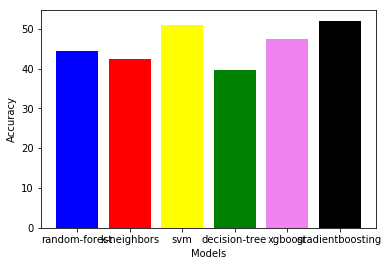

In [45]:
import matplotlib.pyplot as plt1
index = np.arange(1, 7, 1)
plt.bar(index, accuracy, color = ['blue', 'red', 'yellow', 'green', 'violet', 'black'])
plt.xticks(index, models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()